In [245]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from statistics import stdev
import math
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt
from sklearn.model_selection import train_test_split


sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

In [246]:
from google.colab import files

uploaded = files.upload()

Saving titanic.csv to titanic (8).csv


In [247]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
print("number of missing values in the dataframe:")
print(data.isna().sum())

number of missing values in the dataframe:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [249]:
print(round(data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [250]:
data["Age"] = data["Age"].fillna(-1)


for data_index in range(data.shape[0]):
  if data["Age"][data_index] == -1:
    if ((data["Sex"][data_index] == "female") and (data["Pclass"][data_index] == 1)):
      data["Age"][data_index] = 35
    elif((data["Sex"][data_index] == "female") and (data["Pclass"][data_index] == 2)):
      data["Age"][data_index] = 29
    elif((data["Sex"][data_index] == "female") and (data["Pclass"][data_index] == 3)):
      data["Age"][data_index] = 22
    elif((data["Sex"][data_index] == "male") and (data["Pclass"][data_index] == 1)):
      data["Age"][data_index] = 41
    elif((data["Sex"][data_index] == "male") and (data["Pclass"][data_index] == 2)):
      data["Age"][data_index] = 31
    elif((data["Sex"][data_index] == "male") and (data["Pclass"][data_index] == 3)):
      data["Age"][data_index] = 27

In [251]:

print("Percentage of missing values in feature 'Age': ", str((data["Age"].isna().sum())))

Percentage of missing values in feature 'Age':  0


In [252]:
data = data.drop(columns = ["Cabin"])
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [253]:
data.dropna(inplace = True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [254]:
#drop trivial features
data.drop(columns=["PassengerId", "Name", "Ticket"], inplace = True)


<Axes: xlabel='Survived', ylabel='Fare'>

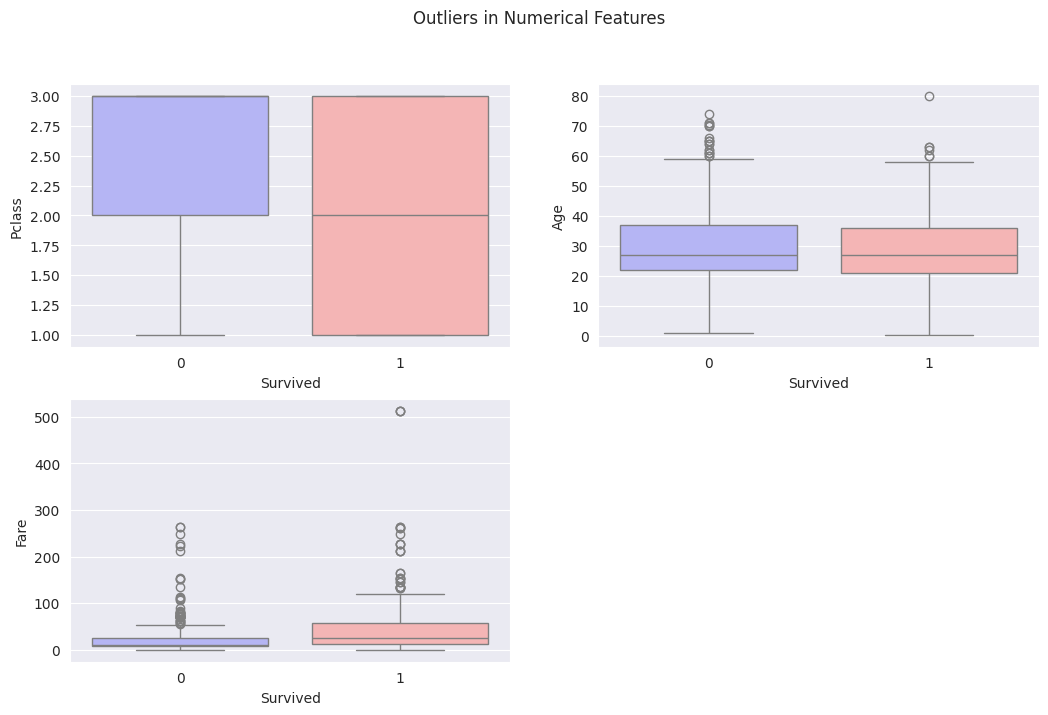

In [255]:
#plotting data in boxplot method to check for outliners
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])
data['Survived'] = data['Survived'].astype(int)
sns.boxplot(ax = axes[0, 0],  data = data, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1],  data = data, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0],  data = data, x = "Survived", y = "Fare", palette = "bwr")

In [256]:
print(data["Pclass"].unique())
print(data["Sex"].unique())

[3 1 2]
['male' 'female']


In [257]:
#categorial encoding
data["Sex"].replace("female", 0, inplace = True)
data["Sex"].replace("male", 1, inplace = True)
data.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [258]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [259]:
#encoding
def encode_embarked(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

data["Embarked"] = encode_embarked(list(data["Embarked"]))
print(data["Embarked"][0:5])

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


<Axes: xlabel='Survived', ylabel='Embarked'>

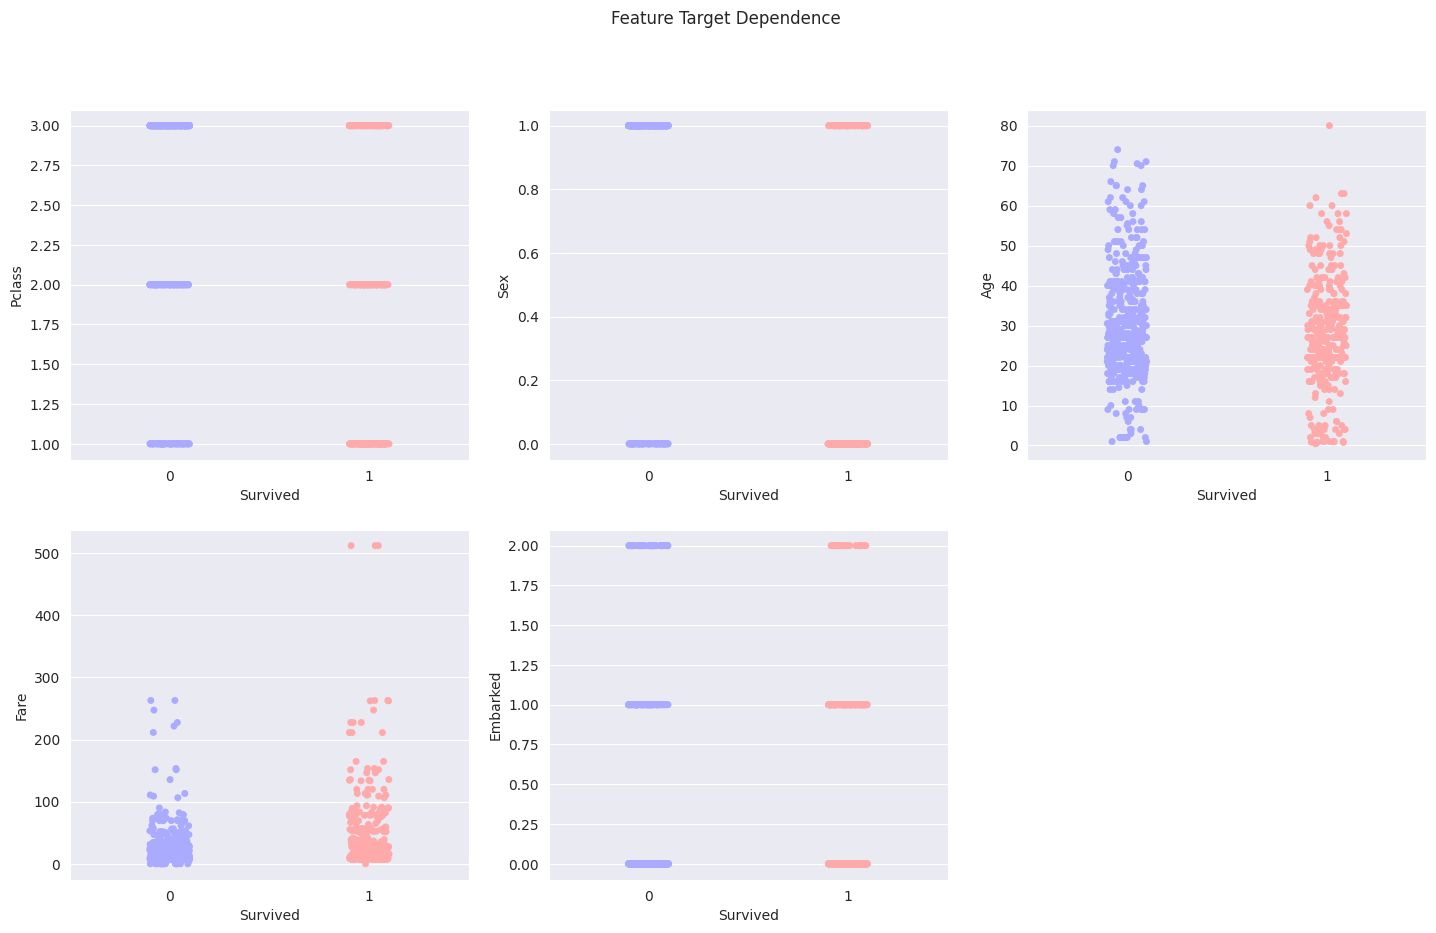

In [260]:
#visualising data
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = data, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = data, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = data, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = data, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = data, x = "Survived", y = "Embarked", palette = "bwr")

In [261]:
#split dataset
X = data
X_train, X_test = train_test_split(X, train_size = 0.8, random_state = 13)

In [262]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


In [263]:
X_train.head
X_test.head


<bound method NDFrame.head of      Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           1       3    0  22.0      2      0  23.2500         2
1           0       2    1  25.0      0      0  13.0000         0
2           0       3    1  27.0      0      0   7.8958         0
3           0       3    1  42.0      0      1   8.4042         0
4           1       3    0  22.0      0      0   7.7500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
173         1       3    1  27.0      0      0  56.4958         0
174         0       3    1  30.5      0      0   8.0500         0
175         1       2    0  31.0      1      1  26.2500         0
176         0       3    1  27.0      0      0   7.2292         1
177         0       3    1  27.0      0      0   8.0500         0

[178 rows x 8 columns]>

In [264]:
def div(x_data, fkey, fval):
    x_right = x_data[x_data[fkey] >= fval]
    x_left = x_data[x_data[fkey] < fval]
    return x_right, x_left


In [265]:
def entropy(sub):
   unique_sub, counts = np.unique(sub, return_counts=True)
   prob = counts / len(sub)
   entropy = -np.sum(prob * np.log2(prob))
   return entropy



In [266]:
def information_gain(x_data, fkey, fval):
    right, left = div(x_data, fkey, fval)

    l = len(left) / len(x_data)
    r = len(right) / len(x_data)

    if len(left) == 0 or len(right) == 0:
        return -99999

    i_gain = entropy(x_data['Survived']) - (l * entropy(left['Survived']) + r * entropy(right['Survived']))
    return i_gain

In [267]:
class DecisionTree:
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None

    def train(self, x_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
        info_gains = [information_gain(x_train, feature, x_train[feature].mean()) for feature in features]

        best_feature_index = np.argmax(info_gains)
        self.split_feature = features[best_feature_index]
        self.split_value = x_train[self.split_feature].mean()

        print("Splitting Tree by", self.split_feature)

        data_right, data_left = div(x_train, self.split_feature, self.split_value)
        data_right = data_right.reset_index(drop=True)
        data_left = data_left.reset_index(drop=True)

        if data_left.shape[0] == 0 or data_right.shape[0] == 0 or self.depth >= self.max_depth:
            self.target = "Positive" if x_train.Survived.mean() >= 0.5 else "Negative"
            return

        self.left = DecisionTree(self.depth + 1, self.max_depth)
        self.left.train(data_left)

        self.right = DecisionTree(self.depth + 1, self.max_depth)
        self.right.train(data_right)

        self.target = "Positive" if x_train.Survived.mean() >= 0.5 else "Negative"

    def infer(self, test):
        if test[self.split_feature] > self.split_value:
            if self.right is None:
                return self.target
            return self.right.infer(test)

        if test[self.split_feature] < self.split_value:
            if self.left is None:
                return self.target
            return self.left.infer(test)

        # Handle the case when test[self.split_feature] is equal to self.split_value
        return self.target

In [268]:
dt = DecisionTree()

In [269]:
dt.train(X_train)

Splitting Tree by Sex
Splitting Tree by Pclass
Splitting Tree by Pclass
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Parch
Splitting Tree by Embarked
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Embarked
Splitting Tree by SibSp
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by SibSp
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Embarked
Splitting Tree by SibSp
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Parch
Splitting Tree by Pclass
Splitting Tree by Pclass
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by Embarked
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by 

In [270]:
y_pred_1 = []
for ix in range(X_train.shape[0]):
    y_pred_1.append(dt.infer(X_train.loc[ix]))

y_pred_2 = []
for ix in range(X_test.shape[0]):
    y_pred_2.append(dt.infer(X_test.loc[ix]))

In [271]:
for i in range(len(y_pred_1)):
    if y_pred_1[i] == "Negative":
        y_pred_1[i] = 0
    else:
        y_pred_1[i] = 1

for i in range(len(y_pred_2)):
    if y_pred_2[i] == "Positive":
        y_pred_2[i] = 1
    else:
        y_pred_2[i] = 0

In [272]:
print('overall acc for train set : ',np.mean(y_pred_1 == X_train['Survived']))
print('overall acc for test set : ',np.mean(y_pred_2 == X_test['Survived']))

overall acc for train set :  0.8382559774964838
overall acc for test set :  0.7921348314606742


In [273]:
def by_class_acc(accurate, predicted):
    pred_0 = 0
    pred_1 = 0
    act_0 = 0
    act_1 = 0
    for i in range(accurate.shape[0]):
        if accurate[i] == 0:
            act_0 =act_0 + 1
            if predicted[i] == 0:
                pred_0 = pred_0 +1

        if accurate[i] == 1:
            act_1 =act_1 + 1
            if predicted[i] == 1:
                pred_1 = pred_1 +1

    class_0_accuracy = pred_0/act_0*100
    class_1_accuracy = pred_1/act_1*100
    print("accuracy of predicting dead: ", class_0_accuracy, '%')
    print("accuracy of predicting survived: ", class_1_accuracy, '%')
by_class_acc(X_test['Survived'], y_pred_2)
by_class_acc(X_train['Survived'], y_pred_1)

accuracy of predicting dead:  98.09523809523809 %
accuracy of predicting survived:  52.054794520547944 %
accuracy of predicting dead:  95.72072072072072 %
accuracy of predicting survived:  64.04494382022472 %


In [274]:
X_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,2,0,23.2500,2
1,0,2,1,25.0,0,0,13.0000,0
2,0,3,1,27.0,0,0,7.8958,0
3,0,3,1,42.0,0,1,8.4042,0
4,1,3,0,22.0,0,0,7.7500,2


In [275]:
dt = DecisionTree(max_depth=5)

# Train the decision tree on your training data (assuming X_train contains your features and y_train contains the labels)
dt.train(X_train)

# Make predictions on the test data
predicted_labels = []
for index, row in X_test.iterrows():
    prediction = dt.infer(row)
    predicted_labels.append(1 if prediction == "Positive" else 0)

# Get the actual labels from the test data
actual_labels = X_test['Survived'].values

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Print or use the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Splitting Tree by Sex
Splitting Tree by Pclass
Splitting Tree by Pclass
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Parch
Splitting Tree by Embarked
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Embarked
Splitting Tree by SibSp
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by SibSp
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Embarked
Splitting Tree by SibSp
Splitting Tree by Parch
Splitting Tree by Age
Splitting Tree by Parch
Splitting Tree by Pclass
Splitting Tree by Pclass
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by Embarked
Splitting Tree by Age
Splitting Tree by SibSp
Splitting Tree by 

In [276]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(actual_labels, predicted_labels)

recall = recall_score(actual_labels, predicted_labels)

f1 = f1_score(actual_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.95
Recall: 0.5205479452054794
F1-score: 0.6725663716814159
